# AULA 6 - Prática: Autoencoder em pytorch


Aula 6 - Aula Assíncrona
https://www.youtube.com/watch?v=2EBt0sS7kwI

---

In [30]:
from torchvision import datasets, transforms, utils

import matplotlib.pyplot as plt

import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

In [31]:
# Transforms images to a Pytorch tensor
tensor_transform = transforms.ToTensor()

# Download the MNIST dataset
dataset = datasets.MNIST(root = './data',
                        train = True, 
                        download = True, 
                        transform = tensor_transform)

# Create the data loader
loader = torch.utils.data.DataLoader(dataset = dataset,
                                    batch_size = 32,
                                    shuffle = True)

In [32]:
class Autoencoder(nn.Module):

    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(
        nn.Linear(784, 128),
        nn.ReLU(),
        nn.Linear(128, 32),
        nn.ReLU(),
        )   

        self.decoder = nn.Sequential(
        nn.Linear(32, 128),
        nn.ReLU(),
        nn.Linear(128, 784),
        nn.Sigmoid(),
        )

def forward(self, x):
    z = self.encoder(x)
    x_hat = self.decoder(z)
    return x

In [33]:
net = Autoencoder()
print(net)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=32, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)


In [34]:
loss_fn = nn.MSELoss()
optim = torch.optim.Adam(net.parameters(), lr = 1e-7)

In [44]:
epochs = 20
outputs = []   
losses = []

for epoch in range(epochs):
    print(f'{epoch} ', end = '')
    for (image, _) in loader:
        image = image.view(-1, 784)
        
        output = net(image)
        
        loss = loss_fn(output, image)

        optim.zero_grad()
        loss.backward()
        optim.step()

        losses.append(loss)
        
    output.append((epoch, image, output))

0 

NotImplementedError: 

In [38]:
losses_val = [l.item() for l in losses]

In [39]:
len(losses_val)

0

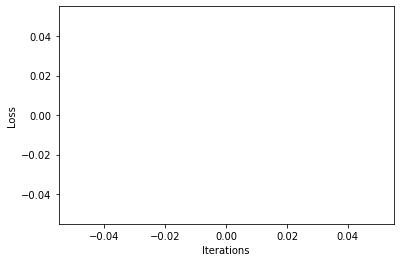

In [40]:
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(losses_val)

In [41]:
for i, item in enumerate(image):
    item = item.reshape(-1, 28, 28)
    plt.subplot(211)
    plt.imshow(item[0], cmap = 'gray)

for i, item in enumerate(reconstructed):
    item = item.reshape(-1, 28, 28)
    plt.subplot(212)
    plt.imshow(item[0].detach().numpy(), cmap = 'gray)

SyntaxError: EOL while scanning string literal (1109301560.py, line 4)

In [42]:
feature_imgs = net.encoder(image)

In [43]:
features_imgs[0].detach().numpy()

NameError: name 'features_imgs' is not defined